In [66]:
#Logistic Regression Example

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [68]:
data={"miles_per_week":[37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      "compeleted_50m_ultra":['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes']}

In [69]:
df=pd.DataFrame(data=data)
df

,miles_per_week,compeleted_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [70]:
#ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder(categories=[['no','yes']])

df["compeleted_50m_ultra"]=ord_enc.fit_transform(df[["compeleted_50m_ultra"]])
df

,miles_per_week,compeleted_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


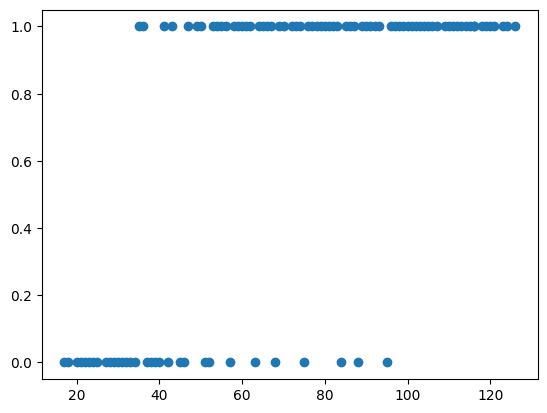

In [71]:
plt.scatter(df.miles_per_week,df.compeleted_50m_ultra)

<Axes: xlabel='compeleted_50m_ultra', ylabel='count'>

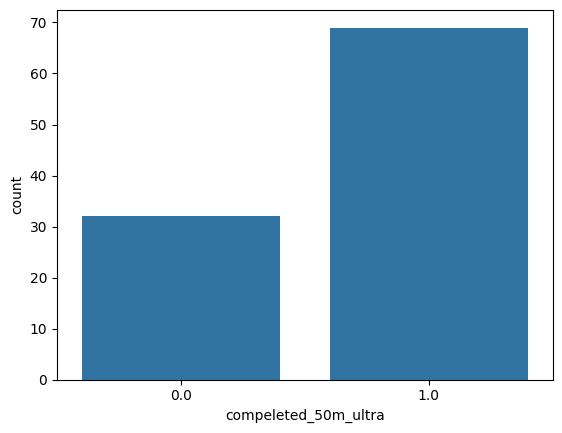

In [72]:
sbn.countplot(x="compeleted_50m_ultra",data=df)

In [73]:
#split data as x and y

x=df[["miles_per_week"]]
x

,miles_per_week
0,37
1,39
2,46
3,51
4,88
...,...
96,67
97,74
98,79
99,90


In [74]:
y=df["compeleted_50m_ultra"]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
Name: compeleted_50m_ultra, Length: 101, dtype: float64

In [75]:
#train test split

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=11)

In [76]:
x_train.shape

(80, 1)

In [85]:
x_test.shape

(21, 1)

In [86]:
#scale x and y i

from base64 import standard_b64decode
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_predicted=log_reg.predict(x_test)
y_predicted

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0.])

In [89]:
log_reg.score(x_test,y_test)

0.9047619047619048

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predicted)

array([[ 5,  1],
       [ 1, 14]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

